In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [7]:
data1_=loadmat("E:/andrew machine learning/andrew_ml_ex67101/ex6data1.mat")
data1=pd.DataFrame(data1_["X"],columns=["X1","X2"])
data1["y"]=data1_["y"]
data1.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [43]:
def plot_init_data(data,fig,ax):
    positive=data[data["y"]==1]
    negative=data[data["y"]==0]
    
    ax.scatter(positive["X1"],positive["X2"],s=50,marker="x",label="positive")
    ax.scatter(negative["X1"],negative["X2"],s=50,marker="o",label="negative")

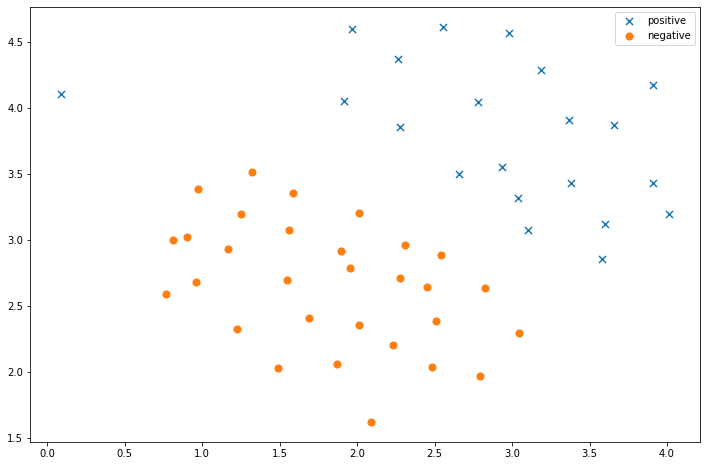

In [13]:
fig,ax=plt.subplots(figsize=(12,8))
plot_init_data(data1,fig,ax)
ax.legend()
plt.show()

In [15]:
from sklearn import svm
svc=svm.LinearSVC(C=1,loss="hinge",max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [16]:
svc.fit(data1[["X1","X2"]],data1["y"])
svc.score(data1[["X1","X2"]],data1["y"])

c:\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9803921568627451

In [31]:
def find_decision_boundary(svc,x1min,x1max,x2min,x2max,diff):
    x1=np.linspace(x1min,x1max,1000)
    x2=np.linspace(x2min,x2max,1000)
    
    coordinates=[(x,y) for x in x1 for y in x2]
    x_cord,y_cord=zip(*coordinates)
    c_val=pd.DataFrame({"x1":x_cord,"x2":y_cord})
    c_val["cval"]=svc.decision_function(c_val[["x1","x2"]])
    
    decision=c_val[np.abs(c_val["cval"])<diff]
    return decision.x1, decision.x2

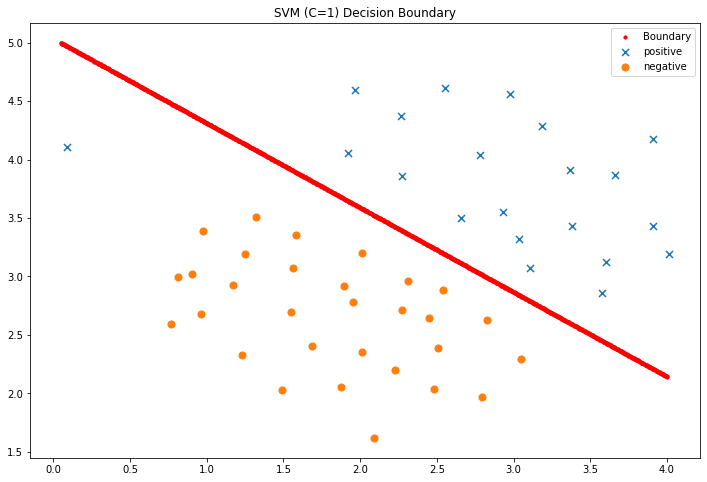

In [33]:
x1,x2=find_decision_boundary(svc,0,4,1.5,5,2 * 10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='r',label='Boundary')
plot_init_data(data1,fig,ax)
ax.set_title('SVM (C=1) Decision Boundary')
ax.legend()
plt.show()

In [36]:
svc2=svm.LinearSVC(C=100,loss="hinge",max_iter=1000)
svc2.fit(data1[["X1","X2"]],data1["y"])

c:\python38\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

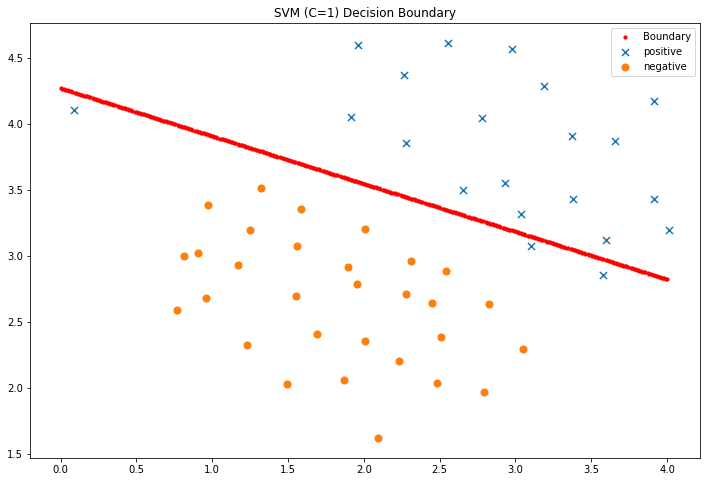

In [37]:
x1,x2=find_decision_boundary(svc2,0,4,1.5,5,2 * 10**-3)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='r',label='Boundary')
plot_init_data(data1,fig,ax)
ax.set_title('SVM (C=1) Decision Boundary')
ax.legend()
plt.show()

In [38]:
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-(np.sum(x1-x2)**2)/(2*sigma**2))

In [39]:
x1=np.array([1.0,2.0,1.0])
x2=np.array([0.0,4.0,-1.0])
sigma=2

In [40]:
gaussian_kernel(x1,x2,sigma)

0.8824969025845955

In [41]:
data2_=loadmat("E:/andrew machine learning/andrew_ml_ex67101/ex6data2.mat")
data2=pd.DataFrame(data2_["X"],columns=["X1","X2"])
data2["y"]=data2_["y"]
data2.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


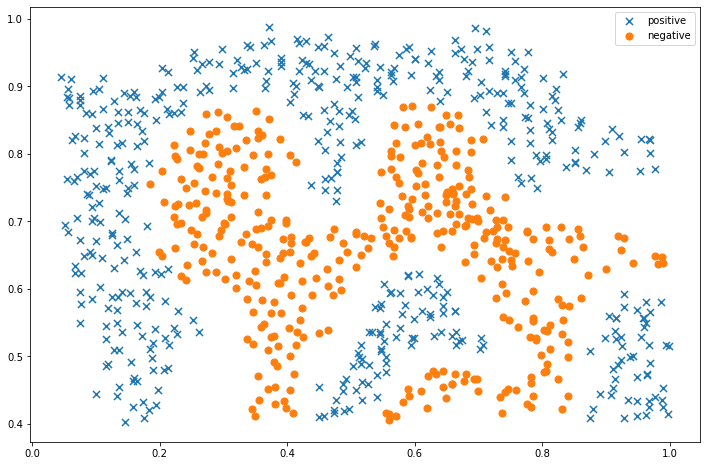

In [44]:
fig,ax=plt.subplots(figsize=(12,8))
plot_init_data(data2,fig,ax)
ax.legend()
plt.show()

In [45]:
svc3=svm.SVC(C=100,gamma=10,probability=True)
svc3

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [46]:
svc3.fit(data2[["X1","X2"]],data2["y"])
svc3.score(data2[["X1","X2"]],data2["y"])

0.9698725376593279

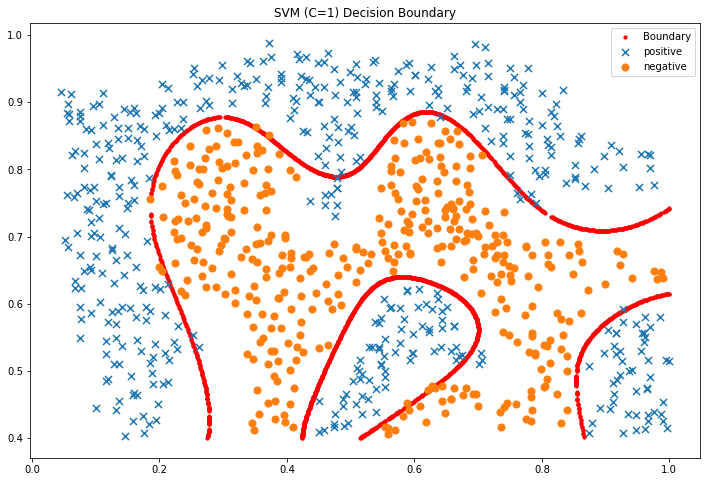

In [47]:
x1,x2=find_decision_boundary(svc3,0,1,0.4,1,0.01)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(x1,x2,s=10,c='r',label='Boundary')
plot_init_data(data2,fig,ax)
ax.set_title('SVM (C=1) Decision Boundary')
ax.legend()
plt.show()

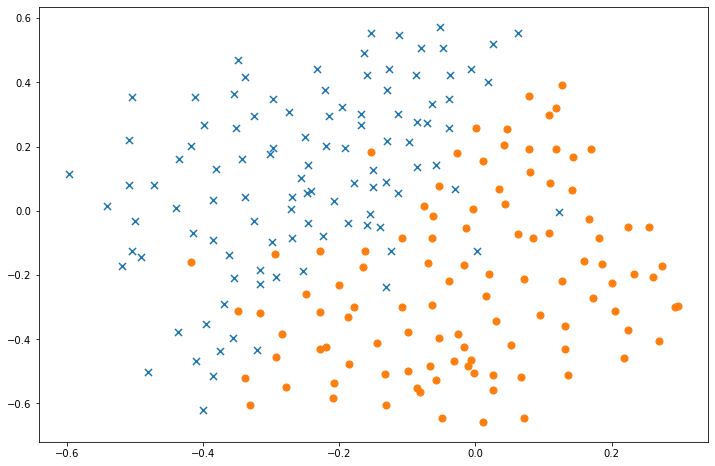

In [53]:
data3_=loadmat("E:/andrew machine learning/andrew_ml_ex67101/ex6data3.mat")
X=data3_["X"]
Xval=data3_["Xval"]
y=data3_["y"].ravel()
yval=data3_["yval"].ravel()

fig,ax=plt.subplots(figsize=(12,8))
data3=pd.DataFrame(data3_["X"],columns=["X1","X2"])
data3["y"]=data3_["y"]
plot_init_data(data3,fig,ax)
plt.show()

In [54]:
C_values=[0.01,0.03,0.1,0.3,1,3,10,30,100]
gamma_values=[0.01,0.03,0.1,0.3,1,3,10,30,100]

best_score=0
best_params={'C': None, 'gamma': None}

In [57]:
for C in C_values:
    for gamma in gamma_values:
        svc=svm.SVC(C=C,gamma=gamma)
        svc.fit(X,y)
        score=svc.score(Xval,yval)
    
    if score>best_score:
        best_score=score
        best_params["C"]=C
        best_params["gamma"]=gamma

best_score,best_params

(0.965, {'C': 0.3, 'gamma': 100})

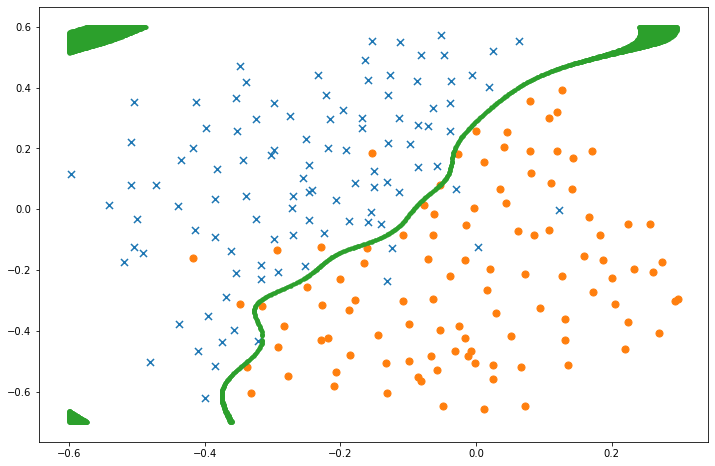

In [59]:
svc=svm.SVC(C=best_params["C"],gamma=best_params["gamma"])
svc.fit(X,y)

x1,x2=find_decision_boundary(svc,-0.6,0.3,-0.7,0.6,0.005)
fig,ax=plt.subplots(figsize=(12,8))
plot_init_data(data3, fig, ax)
ax.scatter(x1,x2,s=10)
plt.show()

In [61]:
spam_train=loadmat("E:/andrew machine learning/andrew_ml_ex67101/spamTrain.mat")
spam_test=loadmat("E:/andrew machine learning/andrew_ml_ex67101/spamTest.mat")

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [62]:
X=spam_train['X']
Xtest=spam_test['Xtest']
y=spam_train['y'].ravel()
ytest=spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

In [63]:
svc = svm.SVC()
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Training accuracy = 99.32%
Test accuracy = 98.7%


In [69]:
kw = np.eye(1899)
kw[:3,:]
spam_val = pd.DataFrame({'idx':range(1899)})

In [71]:
spam_val['isspam'] = svc.decision_function(kw)

In [72]:
spam_val['isspam'].describe()

count    1899.000000
mean       -0.110039
std         0.049094
min        -0.428396
25%        -0.131213
50%        -0.111985
75%        -0.091973
max         0.396286
Name: isspam, dtype: float64

In [73]:
decision = spam_val[spam_val['isspam'] > -0.55]
decision

,idx,isspam
0,0,-0.093653
1,1,-0.083078
2,2,-0.109401
3,3,-0.119685
4,4,-0.165824
...,...,...
1894,1894,0.101613
1895,1895,-0.016065
1896,1896,-0.151573
1897,1897,-0.109022


In [74]:
path="E:/andrew machine learning/andrew_ml_ex67101/vocab.txt"
voc=pd.read_csv(path, header=None, names=['idx', 'voc'], sep = '\t')
voc.head()

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [75]:
spamvoc = voc.loc[list(decision['idx'])]
spamvoc

,idx,voc
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
...,...,...
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero
